In [90]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARMA
%matplotlib inline

In [91]:
df = pd.read_csv(Path('4_coins.csv'))
df.set_index('Date',inplace = True)

In [92]:
df = df.pct_change()

In [93]:
df = df.dropna()

In [94]:
df.head()

,EOSUSDT,ETHUSDT,LINKUSDT,LTCUSDT
Date,,,,
8/20/2020 0:01,0.002985,0.003769,0.002465,0.003537
8/20/2020 0:02,0.000000,0.001146,0.000000,-0.000160
8/20/2020 0:03,0.000000,-0.000219,0.002459,0.003846
8/20/2020 0:04,0.002976,0.002338,0.000613,0.001756
8/20/2020 0:05,0.000000,0.000462,0.002451,-0.003346


In [128]:
# define forecasting sample
f_sample = 50
df_insample = pd.DataFrame()
S = []
residuals2_mean = []
residuals2_std = []
count = 0

In [136]:
for n in range(f_sample): #f_sample is the out-of-sample data
    df_insample = df.iloc[0 : len(df) - f_sample + n]
    X = df_insample.ETHUSDT.values.reshape(-1, 1)
    y = df_insample.LTCUSDT
    model = LinearRegression()
    model.fit(X, y)
    predicted_y_values = model.predict(X)
    residuals = df_insample.loc[:,'ETHUSDT'] - predicted_y_values
    model_AR = ARMA(residuals.values, order = (1,0))
    results = model_AR.fit()
    a = results.params[0]
    b = results.params[1]
    kappa = -np.log(b)
    m = a / (1 - np.exp(-kappa))
    residuals_shifted = residuals.shift()
    residuals2 = residuals - (a + b*residuals_shifted)
    residuals2_mean.append(residuals2.mean())
    residuals2_std.append(residuals2.std())
    sigma_epsilon = residuals2.std()
    sigma = sigma_epsilon / np.sqrt( (1 - np.exp(-2*kappa))/(2*kappa))
    S.append(- m*np.sqrt(2*kappa)/sigma)     
    print(n)
    print(len(residuals2))
    if abs(residuals2[-1]) > 1*residuals2_std[n]:
        print('trade')
        count +=1
    else:
        print("don't trade")
    print(f'number of trading signals is {count}')        

0
3932
don't trade
number of trading signals is 11
1
3933
don't trade
number of trading signals is 11
2
3934
don't trade
number of trading signals is 11
3
3935
don't trade
number of trading signals is 11
4
3936
don't trade
number of trading signals is 11
5
3937
don't trade
number of trading signals is 11
6
3938
don't trade
number of trading signals is 11
7
3939
don't trade
number of trading signals is 11
8
3940
don't trade
number of trading signals is 11
9
3941
don't trade
number of trading signals is 11
10
3942
don't trade
number of trading signals is 11
11
3943
don't trade
number of trading signals is 11
12
3944
don't trade
number of trading signals is 11
13
3945
don't trade
number of trading signals is 11
14
3946
don't trade
number of trading signals is 11
15
3947
don't trade
number of trading signals is 11
16
3948
don't trade
number of trading signals is 11
17
3949
don't trade
number of trading signals is 11
18
3950
don't trade
number of trading signals is 11
19
3951
don't trade
nu

In [137]:
residuals2_mean[-1]

-1.7394228069800812e-08

In [138]:
residuals2_std[-1]

6.945509425866998e-05

In [139]:
S[-1]

0.01754897966667536

In [140]:
residuals2[-1]

2.229926122424174e-05

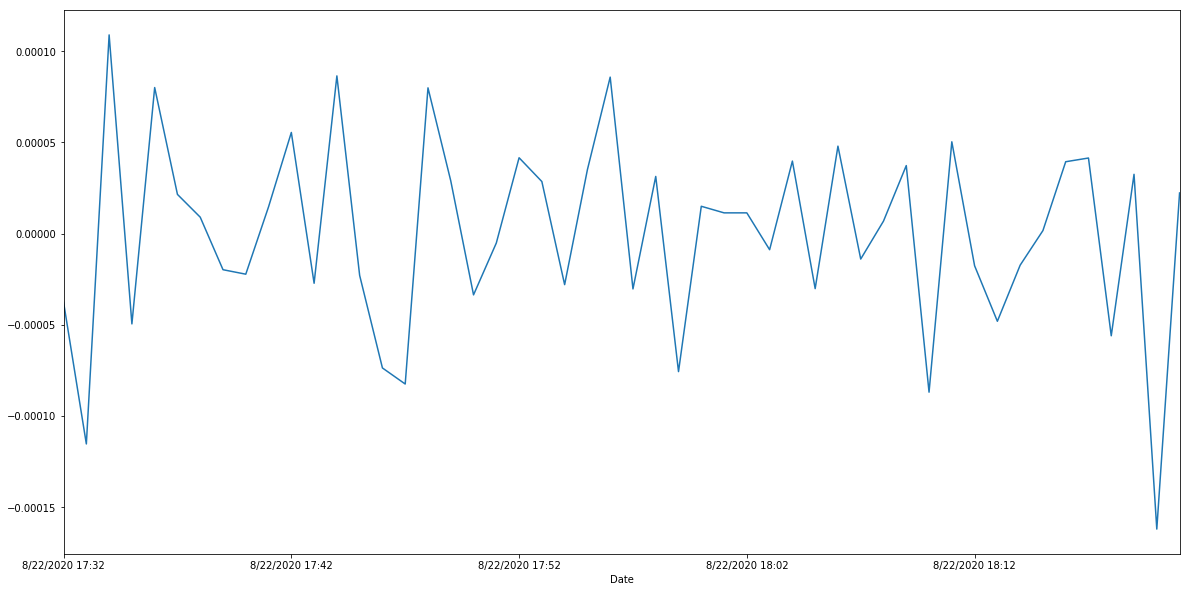

In [141]:
residuals2.iloc[-50:].plot(figsize = [20,10])

In [142]:
residuals2_std

[0.0008103193435991833,
 0.0008102585903257492,
 0.000810452541624669,
 0.0008103693280685019,
 0.0008104132964944342,
 0.0008103576496351974,
 0.0008103874332658924,
 0.0008103209239450804,
 0.0008102399004819866,
 0.0008101396209310468,
 0.0008101408062604763,
 0.0008100443223761301,
 0.0008101387602236297,
 0.0008100363338022797,
 0.0008101194738995289,
 0.0008103187834017622,
 0.000810325488246297,
 0.0008102881742176189,
 0.000810206538527207,
 0.0008101087876946704,
 0.0008100546747474764,
 0.000809995757213306,
 0.0008099067942188221,
 0.0008098294104146548,
 0.0008099915689726097,
 0.0008098924458182569,
 0.0008098090368468646,
 0.0008098501196749895,
 0.0008097479634156208,
 0.0008096516433888139,
 0.0008095553444267111,
 0.0008094543055293078,
 0.0008093599448878406,
 0.0008092285767940136,
 0.0008091061689905827,
 0.0008090164586730055,
 0.0008089149052721542,
 0.0008088580062226178,
 0.0008087088696911534,
 0.0008086219379431142,
 0.0008085372423988111,
 0.00080839287762787